# Loading Dataset & Quick Overview
   * sklearn 波士頓房價預測資料集

In [ ]:
import numpy as np
import pandas as pd
# from sklearn.datasets import load_boston
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
# 設定了繪圖時的預設圖形大小為 15x15
rcParams['figure.figsize'] = 15, 15
# 讀取檔案
data_url = "http://lib.stat.cmu.edu/datasets/boston"
# sep="\s+" 參數指定資料以一個或多個空白字元分隔。skiprows=22 則告訴 pandas 跳過前 22 列資料，因為這些行包含不相關的資訊。header=None 參數表示該資料集沒有欄位名稱，第一行應該被當作資料。
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
print(raw_df)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
print(data)
target = raw_df.values[1::2, 2]
print(target)

             0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8  
3      NaN 

In [ ]:
print(data.shape)  # data ==> Features
print(target.shape)  # target ==> Label

(506, 13)
(506,)


In [ ]:
data.data.shape[0]

506

# Plot Features V.S. Y
Can you explain the relation between other features with house prices?

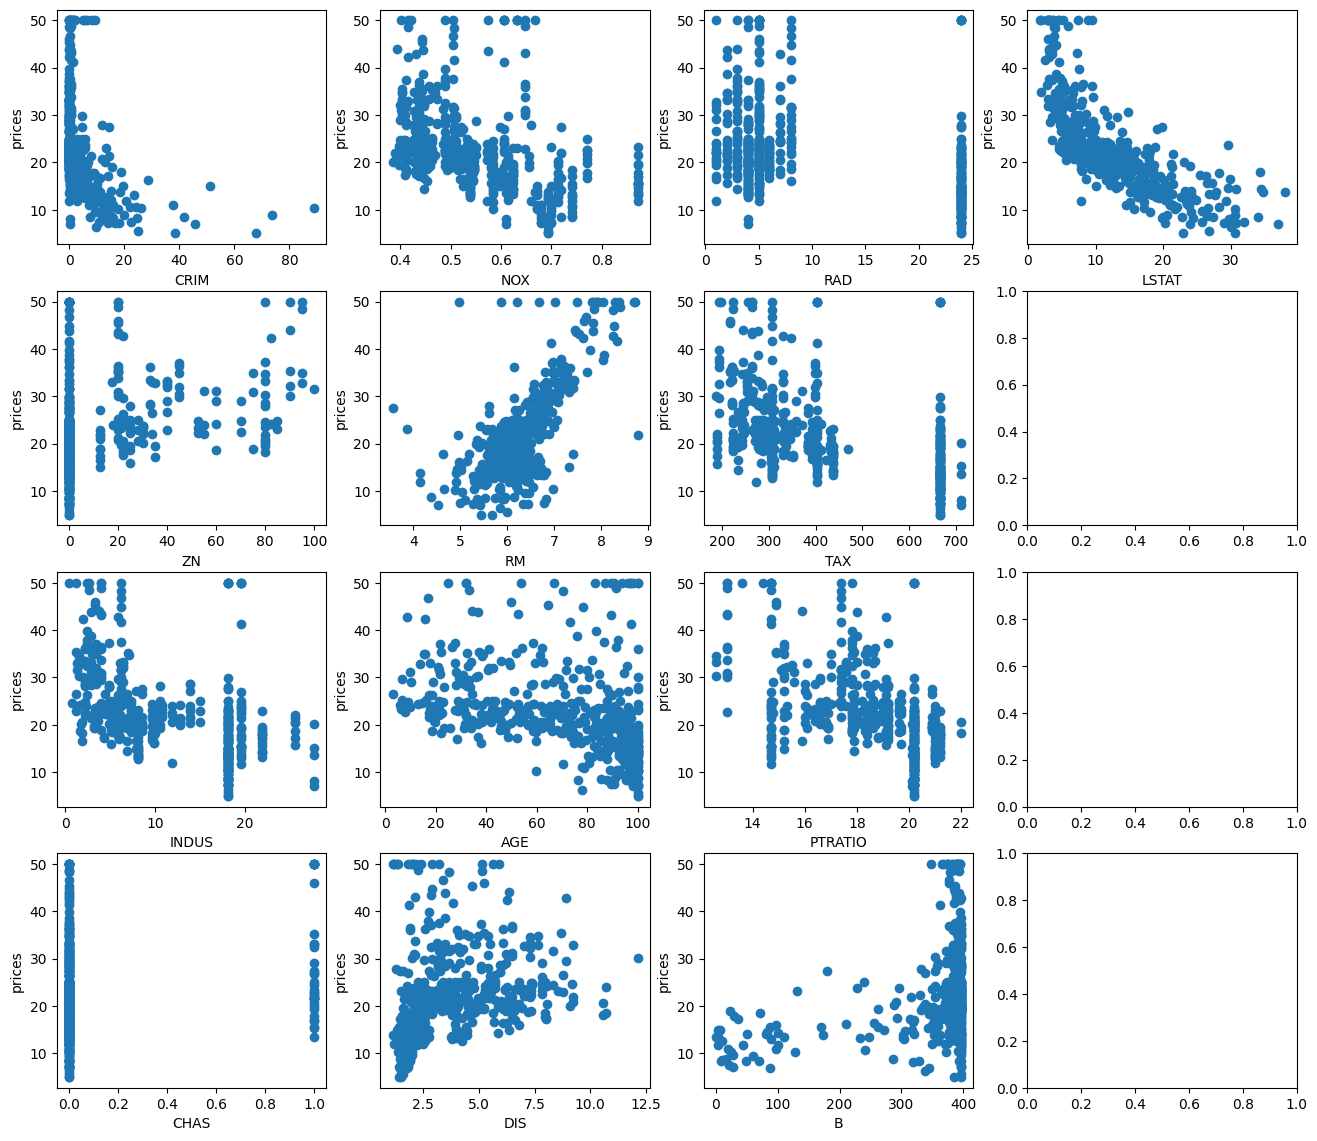

In [ ]:
import math

features = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT'
]

fig, axes = plt.subplots(4, 4, figsize=(16, 14))
for i in range(13):
    x_f = i % 4
    y_f = math.floor((i) / 4)
    axes[x_f, y_f].scatter(data[:, i], target)
    axes[x_f, y_f].set_xlabel(features[i])
    axes[x_f, y_f].set_ylabel('prices')
plt.show()
"""
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
"""
pass

# Predicting Home Prices: Simple Linear Regression

In [ ]:
'''Perform any data transformation here'''
# For example:
data = [
    np.hstack([data[i],
               np.sqrt(data[i]),
               np.log(data[i] + 1)]) for i in range(data.data.shape[0])
]
print(data)

[array([6.32000000e-03, 1.80000000e+01, 2.31000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.57500000e+00, 6.52000000e+01, 4.09000000e+00,
       1.00000000e+00, 2.96000000e+02, 1.53000000e+01, 3.96900000e+02,
       4.98000000e+00, 7.94984277e-02, 4.24264069e+00, 1.51986842e+00,
       0.00000000e+00, 7.33484833e-01, 2.56417628e+00, 8.07465170e+00,
       2.02237484e+00, 1.00000000e+00, 1.72046505e+01, 3.91152144e+00,
       1.99223493e+01, 2.23159136e+00, 6.30011255e-03, 2.94443898e+00,
       1.19694819e+00, 0.00000000e+00, 4.30482871e-01, 2.02485335e+00,
       4.19268046e+00, 1.62727783e+00, 6.93147181e-01, 5.69373214e+00,
       2.79116511e+00, 5.98620072e+00, 1.78842057e+00]), array([2.73100000e-02, 0.00000000e+00, 7.07000000e+00, 0.00000000e+00,
       4.69000000e-01, 6.42100000e+00, 7.89000000e+01, 4.96710000e+00,
       2.00000000e+00, 2.42000000e+02, 1.78000000e+01, 3.96900000e+02,
       9.14000000e+00, 1.65257375e-01, 0.00000000e+00, 2.65894716e+00,
       0.00000000e+

In [ ]:
X = data
y = target

In [ ]:
# import needed models in scikit-learn by yourself
# and fit a linear model using training dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42,
                                                    shuffle=True)

model = LinearRegression()
# model = '''train a linear model using training dataset here'''
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# make prediction here
# y_pred = '''make prediction on testing dataset here'''
y_pred = model.predict(X_test)

RMS: 3.627774891955539
R2:0.82


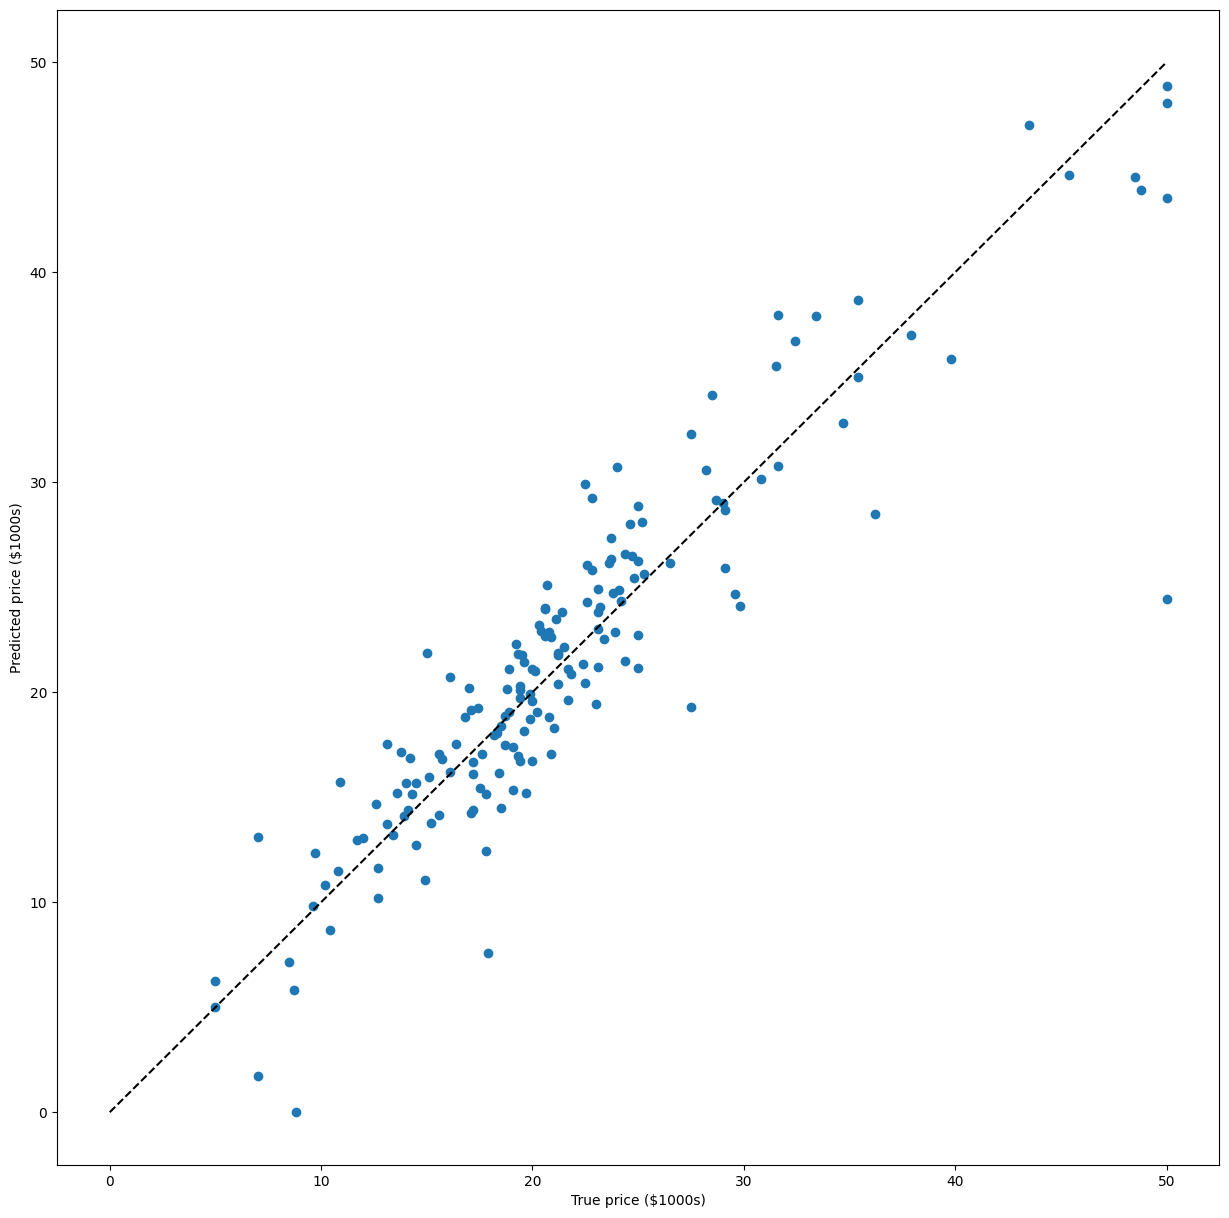

In [ ]:
# visualize the result
%matplotlib inline
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:", np.sqrt(np.mean((y_pred - y_test)**2)))
print('R2:%.2f' % metrics.r2_score(y_pred, y_test))

1.Try normalization
2.Try other transformation
3.Use Lasso Regularization to see feature importance

In [ ]:
# import needed models in scikit-learn by yourself
# and fit a linear model using training dataset
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.0001)
# model = '''train a linear model using training dataset here'''
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.409e+03, tolerance: 2.988e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0001)

RMS:3.67
R2:0.81


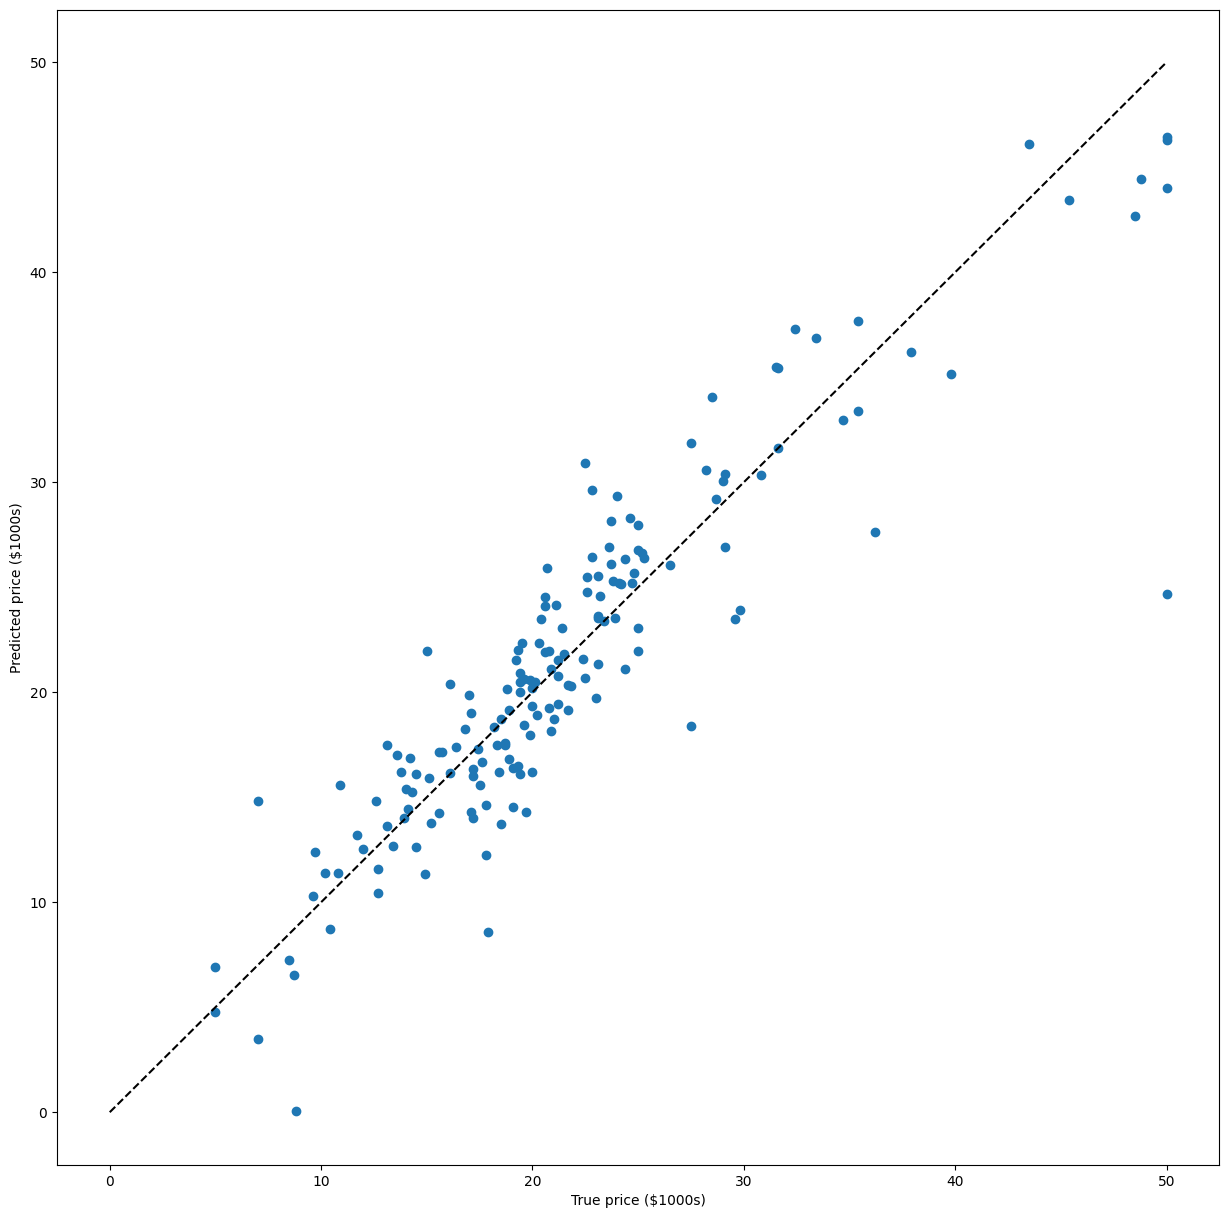

In [ ]:
from sklearn import metrics
y_pred = model.predict(X_test)
# visualize the result
%matplotlib inline
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:%.2f" % np.sqrt(np.mean((y_pred - y_test)**2)))
print('R2:%.2f' % metrics.r2_score(y_pred, y_test))

In [ ]:
type(metrics.r2_score(y_pred, y_test))

numpy.float64

In [ ]:
print(' R2:%.2f' % metrics.r2_score(y_pred, y_test))

 R2:0.81
